## Airline Recommendation System - Data 602 project - Group 4

### Import the required Libraries

In [ ]:
pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 5.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630152 sha256=d0128a33da0c245459733ed5177450d911643ef1dfe479d9ea5025c20131e40f
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Read the data

In [ ]:
data = pd.read_csv("Airline_data.csv")

In [ ]:
data.head(1)

,Unnamed: 0,Unnamed: 0.1,airline_name,author,author_country,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,adria-airways,D Ito,Germany,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied


In [ ]:
data = data.drop(['Unnamed: 0.1','content','Class','Food and drink','Seat comfort',
                  'Inflight entertainment','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction'], axis=1)

In [ ]:
data.head(5)

,Unnamed: 0,airline_name,author,author_country,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,...,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0,adria-airways,D Ito,Germany,Economy,7.0,4.0,4.0,4.0,0.0,...,4,3,1,3,4,3,4,4,5,5
1,1,adria-airways,Ron Kuhlmann,United States,Business Class,10.0,4.0,5.0,4.0,1.0,...,2,3,3,3,1,5,3,1,4,1
2,2,adria-airways,E Albin,Switzerland,Economy,9.0,5.0,5.0,4.0,0.0,...,2,2,2,5,4,3,4,4,4,5
3,3,adria-airways,Tercon Bojan,Singapore,Business Class,8.0,4.0,4.0,3.0,1.0,...,5,5,5,2,2,5,3,1,4,2
4,4,adria-airways,L James,Poland,Economy,4.0,4.0,2.0,1.0,2.0,...,3,3,3,5,3,4,4,3,3,3


In [ ]:
data.columns

Index(['Unnamed: 0', 'airline_name', 'author', 'author_country', 'cabin_flown',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'value_money_rating', 'Month', 'Year', 'recommended', 'id', 'Gender',
       'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Online boarding',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27284 entries, 0 to 27283
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         27284 non-null  int64  
 1   airline_name                       27284 non-null  object 
 2   author                             27284 non-null  object 
 3   author_country                     27284 non-null  object 
 4   cabin_flown                        27284 non-null  object 
 5   overall_rating                     27284 non-null  float64
 6   seat_comfort_rating                27284 non-null  float64
 7   cabin_staff_rating                 27284 non-null  float64
 8   food_beverages_rating              27284 non-null  float64
 9   inflight_entertainment_rating      27284 non-null  float64
 10  value_money_rating                 27284 non-null  float64
 11  Month                              27284 non-null  int

In [ ]:
data.describe()

,Unnamed: 0,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended,...,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,...,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000
mean,13641.500000,6.067879,3.259566,3.522944,3.016493,2.553108,3.411413,6.221742,2013.692530,0.603870,...,3.060218,2.759969,2.974564,3.256084,3.380150,3.349362,3.628867,3.316816,3.643784,3.288044
std,7876.356709,3.216066,1.351689,1.460053,1.515096,1.696009,1.440927,3.397493,0.999572,0.489101,...,1.534919,1.406039,1.288333,1.350495,1.288258,1.310105,1.180482,1.262310,1.173491,1.315067
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1970.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,6820.750000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2013.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,13641.500000,7.000000,4.000000,4.000000,3.000000,3.000000,4.000000,6.000000,2014.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,20462.250000,9.000000,4.000000,5.000000,4.000000,4.000000,5.000000,9.000000,2014.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,27283.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,2015.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
data.isna().sum()

Unnamed: 0                           0
airline_name                         0
author                               0
author_country                       0
cabin_flown                          0
overall_rating                       0
seat_comfort_rating                  0
cabin_staff_rating                   0
food_beverages_rating                0
inflight_entertainment_rating        0
value_money_rating                   0
Month                                0
Year                                 0
recommended                          0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Online boarding                      0
On-board service         

### Data Exploration

### Correlation Plot

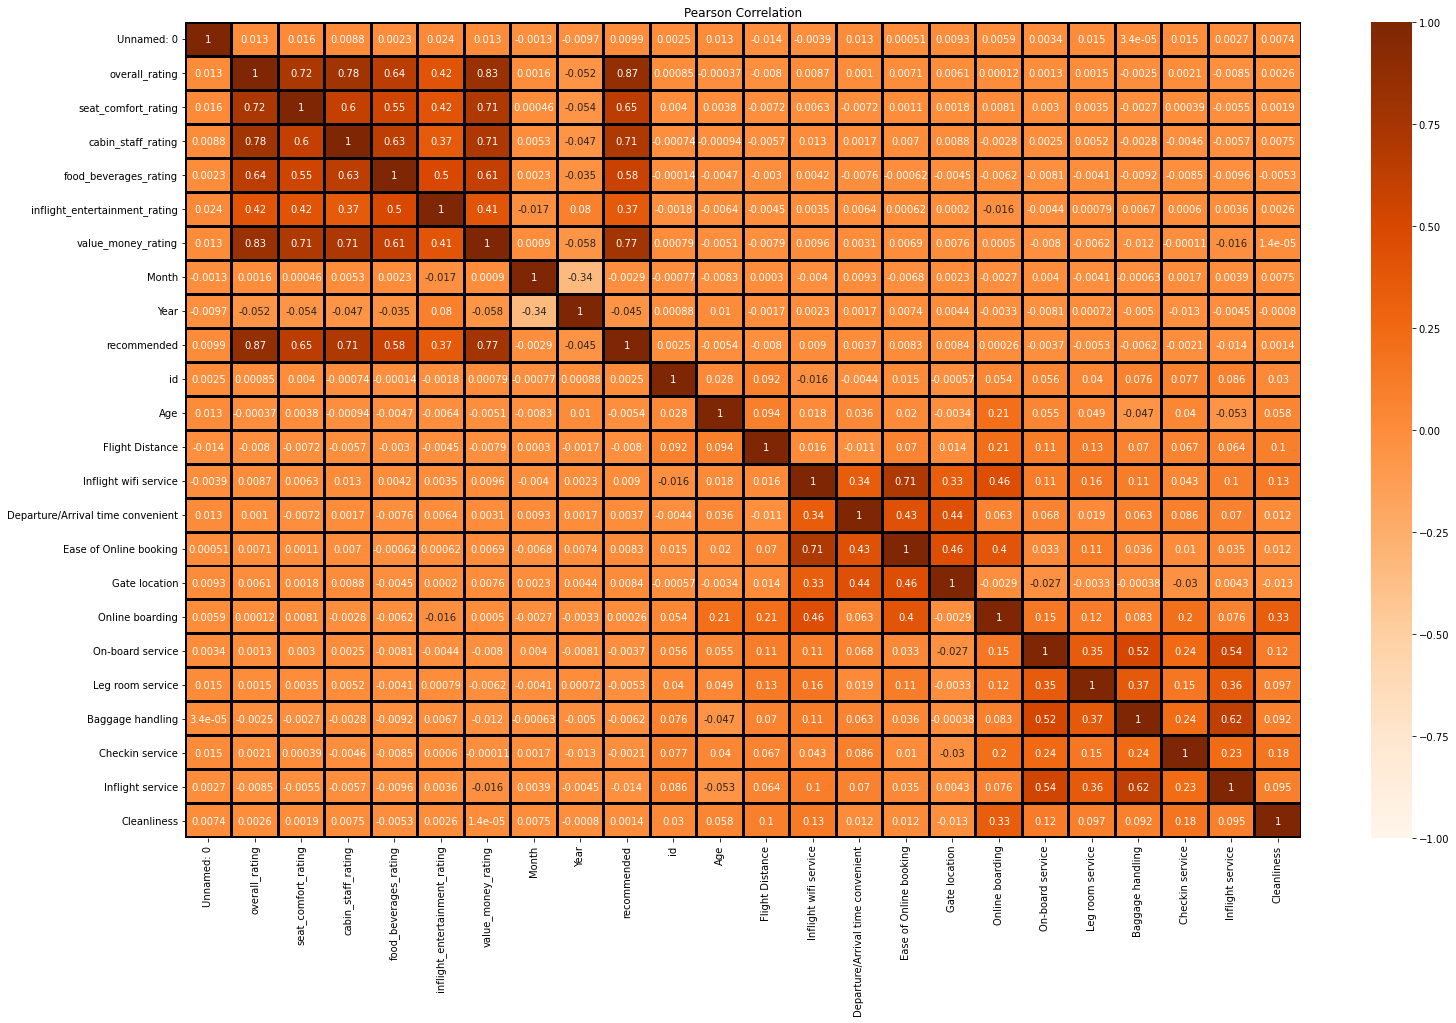

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_Pearson = data.corr(method='pearson')

figure = plt.figure(figsize=(25,15))
sns.heatmap(corr_Pearson,vmin=-1,vmax=+1,cmap='Oranges',annot=True, 
            linewidths=2,linecolor = 'black')
plt.title('Pearson Correlation')
plt.show()

### Pie chart 

In [ ]:
import plotly.express as px
air2 = data["recommended"].value_counts().reset_index()
fig = px.pie(air2,values="recommended",names="index",width=400, height=400)
fig.show()

In [ ]:
gender = data["Gender"].value_counts().reset_index()
fig = px.pie(gender,values="Gender",names="index",width=400, height=400)
fig.show()

In [ ]:
data.select_dtypes(include=['object']).columns

Index(['airline_name', 'author', 'author_country', 'cabin_flown', 'Gender',
       'Customer Type', 'Type of Travel'],
      dtype='object')

In [ ]:
air3 = data.groupby("cabin_flown")["author"].count().reset_index()
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=air3["cabin_flown"], values=air3["author"])])
fig.show()

In [ ]:
df = data.drop(['Unnamed: 0'],axis=1)

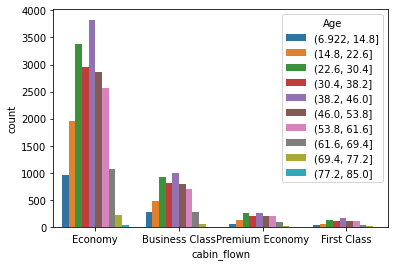

In [ ]:
import seaborn as sns
sns.countplot(x='cabin_flown', hue=pd.cut(df['Age'],10),data=df)

In [ ]:
air1 = data.groupby("airline_name")["author"].count().reset_index().sort_values(by="author", ascending=False).head(10)
a = list(air1["airline_name"])
df2 = data[data['airline_name'].isin(a)]

In [ ]:
import plotly.express as px
fig = px.bar(air1, x='airline_name', y='author')
fig.show()

### number of flights flown in each month

In [ ]:
df.groupby('Month')['airline_name'].agg('count').sort_values()

Month
11    1799
2     1890
8     1942
12    1952
9     2006
10    2259
3     2320
4     2331
6     2446
5     2592
7     2819
1     2928
Name: airline_name, dtype: int64

### Which airline has received the most  reiews by the customers

In [ ]:
airline_counts = pd.DataFrame(df["airline_name"].value_counts())
airline_counts.sort_values("airline_name", ascending=False).head(10)

,airline_name
british-airways,855
united-airlines,803
air-canada-rouge,703
emirates,685
lufthansa,586
american-airlines,579
qantas-airways,576
etihad-airways,512
qatar-airways,491
cathay-pacific-airways,491


### Average rating for each airline

In [ ]:
ratings = pd.DataFrame(df.groupby('airline_name')['overall_rating'].mean())
ratings.head()


,overall_rating
airline_name,
adria-airways,7.705882
aegean-airlines,7.620690
aer-lingus,7.077703
aeroflot-russian-airlines,6.682051
aerogal-aerolineas-galapagos,8.500000


### Count of rating given to each airline

In [ ]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('airline_name')['overall_rating'].count())
ratings.head()


,overall_rating,num of ratings
airline_name,,
adria-airways,7.705882,17
aegean-airlines,7.620690,174
aer-lingus,7.077703,296
aeroflot-russian-airlines,6.682051,195
aerogal-aerolineas-galapagos,8.500000,2


In [ ]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,overall_rating,num of ratings
airline_name,,
british-airways,5.905263,855
united-airlines,3.438356,803
air-canada-rouge,2.522048,703
emirates,6.265693,685
lufthansa,7.017065,586
american-airlines,3.696028,579
qantas-airways,7.008681,576
etihad-airways,4.910156,512
cathay-pacific-airways,6.916497,491


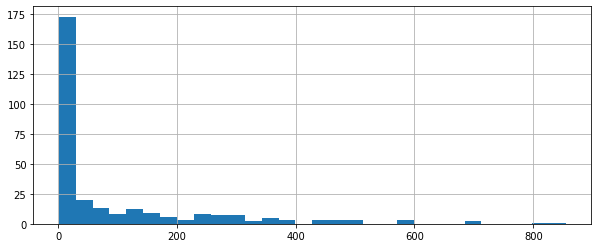

In [ ]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=30)

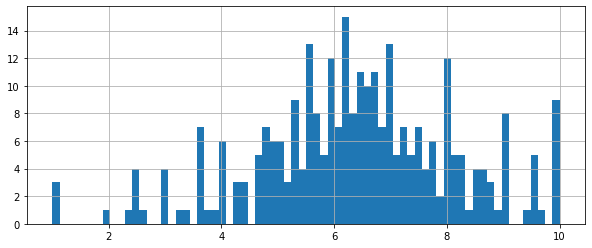

In [ ]:
plt.figure(figsize=(10,4))
ratings['overall_rating'].hist(bins=70)

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()# visualise the numerical variables

Number of numerical variables:  23


,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended,id,...,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,7.0,4.0,4.0,4.0,0.0,4.0,4,2015,1,70172,...,4,3,1,3,4,3,4,4,5,5
1,10.0,4.0,5.0,4.0,1.0,5.0,1,2015,1,5047,...,2,3,3,3,1,5,3,1,4,1
2,9.0,5.0,5.0,4.0,0.0,5.0,9,2014,1,110028,...,2,2,2,5,4,3,4,4,4,5
3,8.0,4.0,4.0,3.0,1.0,4.0,9,2014,1,24026,...,5,5,5,2,2,5,3,1,4,2
4,4.0,4.0,2.0,1.0,2.0,2.0,6,2014,0,119299,...,3,3,3,5,3,4,4,3,3,3


In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['airline_name',
 'author',
 'author_country',
 'cabin_flown',
 'Gender',
 'Customer Type',
 'Type of Travel']

In [ ]:
review_spread1 = data.groupby("author_country")["overall_rating"].count().reset_index().sort_values(by="overall_rating", ascending=False).head(10)
review_spread1.head(10)

,author_country,overall_rating
133,United Kingdom,6275
134,United States,4967
5,Australia,3931
24,Canada,2625
47,Germany,885
114,Singapore,528
93,New Zealand,489
56,India,431
91,Netherlands,364
45,France,350


In [ ]:
import plotly.express as px
fig = px.bar(review_spread1, x='author_country', y='overall_rating')
fig.show()

In [ ]:
cabin_spread = data.groupby("cabin_flown")["overall_rating"].count().reset_index().sort_values(by="overall_rating", ascending=False).head(10)
cabin_spread.head(10)

,cabin_flown,overall_rating
1,Economy,19830
0,Business Class,5329
3,Premium Economy,1374
2,First Class,751


In [ ]:
plt.figure(figsize=(8,5))
import plotly.express as px
fig = px.bar(cabin_spread, x='cabin_flown', y='overall_rating')
fig.show()

<Figure size 576x360 with 0 Axes>

### Year wise analysis

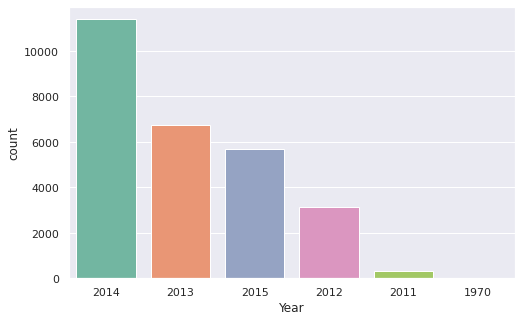

In [ ]:
plt.figure(figsize=(8,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="Year", data=data, palette="Set2", order=data['Year']
                   .value_counts().index[0:15])

In [ ]:
data['id_cus'] = data.groupby(['author']).ngroup()

In [ ]:
data['airline_id'] = data[['airline_name']]

In [ ]:
col = ['airline_id']
le= LabelEncoder()
data[col] = data[col].apply(le.fit_transform)

## Cosine 

In [ ]:
airline_features_df=data.pivot_table(index='airline_name',columns='id_cus',values='overall_rating').fillna(0)
airline_features_df.head()

id_cus,0,1,2,3,4,5,6,7,8,9,...,19624,19625,19626,19627,19628,19629,19630,19631,19632,19633
airline_name,,,,,,,,,,,,,,,,,,,,,
adria-airways,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aegean-airlines,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aer-lingus,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aeroflot-russian-airlines,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aerogal-aerolineas-galapagos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
airline_features_df_matrix = csr_matrix(airline_features_df.values)
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(airline_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(airline_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(airline_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

120


In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(airline_features_df.index[query_index]))
    else:
        print('{0}: {1}:'.format(i, airline_features_df.index[indices.flatten()[i]], distances.flatten()[i]))
        

Recommendations for europe-airpost:

1: norwegian:
2: nok-air:
3: niki:
4: okay-airways:
5: oman-air:


In [ ]:
col = df.columns.tolist()

In [ ]:
le= LabelEncoder()
df[col] = df[col].apply(le.fit_transform)

### Apply the model and get the feature importance

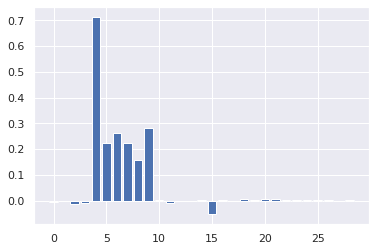

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
X = df.drop(['recommended'], axis=1)
y = df['recommended']
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.datasets import make_classification
X = df.drop(['recommended'], axis=1)
y = df['recommended']

### Split the dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42,)

### Apply Gaussian algorithm to our data

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model=GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9417973904119631


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2725
           1       0.96      0.95      0.95      4096

    accuracy                           0.94      6821
   macro avg       0.94      0.94      0.94      6821
weighted avg       0.94      0.94      0.94      6821



### Apply KNN algorithm to our data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.5370180325465475


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.39      0.29      0.33      2725
           1       0.60      0.70      0.65      4096

    accuracy                           0.54      6821
   macro avg       0.49      0.50      0.49      6821
weighted avg       0.52      0.54      0.52      6821



In [ ]:
from sklearn.linear_model import LogisticRegression
Le = LogisticRegression()
Le.fit(x_train,y_train)
y_pred = Le.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9064653276645653


### Apply Random Forest algorithm to our data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rd = RandomForestClassifier(n_estimators=20)
Rd.fit(x_train,y_train)
y_pred = Rd.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9445829057322973


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2725
           1       0.96      0.95      0.95      4096

    accuracy                           0.94      6821
   macro avg       0.94      0.94      0.94      6821
weighted avg       0.94      0.94      0.94      6821



Text(0.5, 1.0, 'Variable Importances')

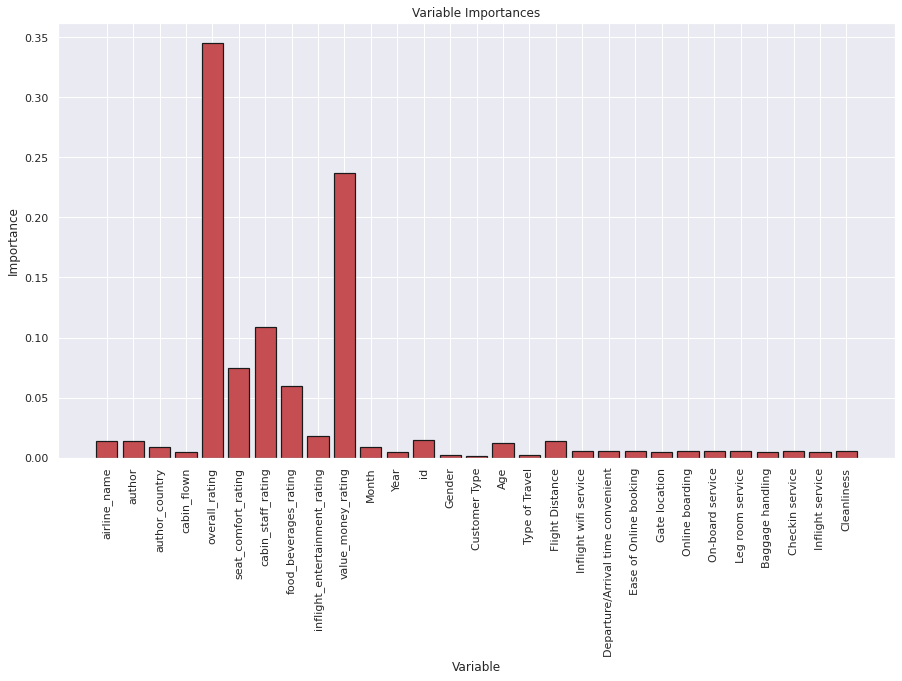

In [ ]:
#Using Random Forest To get Feature Importance as It gives most accuracy
importances = list(Rd.feature_importances_)
x_values = list(range(len(importances)))
feature_list = X.columns
fig = plt.figure(figsize=(15,8))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

## Knowledge Based

In [ ]:
new = data[['airline_name', 'author_country', 'cabin_flown',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'value_money_rating','Age','recommended']]

In [ ]:
new['Age'].describe()

count    27284.000000
mean        39.361897
std         15.060640
min          7.000000
25%         27.000000
50%         40.000000
75%         51.000000
max         85.000000
Name: Age, dtype: float64

In [ ]:
bins=[1,15,30,45,65,85]
labels = ['Childern','Youth', 'Adult', 'Middle Age', 'Senior']
new['Age'] = pd.cut(new['Age'], bins= bins, labels=labels)

In [ ]:
new = (new.groupby(['airline_name', 'cabin_flown','author_country','Age']).mean())
new

overall_rating  \
airline_name   cabin_flown     author_country Age                          
adria-airways  Business Class  Albania        Childern               NaN   
                                              Youth                  NaN   
                                              Adult                  NaN   
                                              Middle Age             NaN   
                                              Senior                 NaN   
...                                                                  ...   
yangon-airways Premium Economy Zimbabwe       Childern               NaN   
                                              Youth                  NaN   
                                              Adult                  NaN   
                                              Middle Age             NaN   
                                              Senior                 NaN   

                                                          seat_comfort_rating  \
airline_name   cabin_flown     author_country Age                               
adria-airways  Business Class  Albania        Childern                    NaN   
                                              Youth                       NaN   
                                              Adult                       NaN   
                                              Middle Age                  NaN   
                                              Senior                      NaN   
...                                                                       ...   
yangon-airways Premium Economy Zimbabwe       Childern                    NaN   
                                              Youth                       NaN   
                                              Adult                       NaN   
                                              Middle Age                  NaN   
                                              Senior                      NaN   

                                                          cabin_staff_rating  \
airline_name   cabin_flown     author_country Age                              
adria-airways  Business Class  Albania        Childern                   NaN   
                                              Youth                      NaN   
                                              Adult                      NaN   
                                              Middle Age                 NaN   
                                              Senior                     NaN   
...                                                                      ...   
yangon-airways Premium Economy Zimbabwe       Childern                   NaN   
                                              Youth                      NaN   
                                              Adult                      NaN   
                                              Middle Age                 NaN   
                                              Senior                     NaN   

                                                          food_beverages_rating  \
airline_name   cabin_flown     author_country Age                                 
adria-airways  Business Class  Albania        Childern                      NaN   
                                              Youth                         NaN   
                                              Adult                         NaN   
                                              Middle Age                    NaN   
                                              Senior                        NaN   
...                                                                         ...   
yangon-airways Premium Economy Zimbabwe       Childern                      NaN   
                                              Youth                         NaN   
                                              Adult                         NaN   
                                              Middle Age     

In [ ]:
new = new.dropna()
new

overall_rating  \
airline_name      cabin_flown     author_country Age                          
adria-airways     Business Class  Singapore      Youth             8.000000   
                                                 Adult             7.500000   
                                  Turkey         Youth             7.000000   
                                  United States  Youth            10.000000   
                  Economy         Canada         Middle Age        8.000000   
...                                                                     ...   
xl-airways-france Economy         United States  Adult             8.500000   
                                                 Middle Age        6.333333   
                  Premium Economy Singapore      Middle Age        3.000000   
                                  United States  Middle Age       10.000000   
yangon-airways    Economy         Australia      Middle Age       10.000000   

                                                             seat_comfort_rating  \
airline_name      cabin_flown     author_country Age                               
adria-airways     Business Class  Singapore      Youth                  4.000000   
                                                 Adult                  3.500000   
                                  Turkey         Youth                  2.000000   
                                  United States  Youth                  4.000000   
                  Economy         Canada         Middle Age             4.000000   
...                                                                          ...   
xl-airways-france Economy         United States  Adult                  3.166667   
                                                 Middle Age             2.666667   
                  Premium Economy Singapore      Middle Age             4.000000   
                                  United States  Middle Age             3.000000   
yangon-airways    Economy         Australia      Middle Age             5.000000   

                                                             cabin_staff_rating  \
airline_name      cabin_flown     author_country Age                              
adria-airways     Business Class  Singapore      Youth                 4.000000   
                                                 Adult                 3.000000   
                                  Turkey         Youth                 5.000000   
                                  United States  Youth                 5.000000   
                  Economy         Canada         Middle Age            4.000000   
...                                                                         ...   
xl-airways-france Economy         United States  Adult                 4.333333   
                                                 Middle Age            4.000000   
                  Premium Economy Singapore      Middle Age            3.000000   
                                  United States  Middle Age            5.000000   
yangon-airways    Economy         Australia      Middle Age            5.000000   

                                                             food_beverages_rating  \
airline_name      cabin_flown     author_country Age                                 
adria-airways     Business Class  Singapore      Youth                         3.0   
                                                 Adult                         4.0   
                                  Turkey         Youth                         4.0   
                                  United States  Youth                         4.0   
                  Economy         Canada         Middle Age                    4.0   
...                                                                            ...   
xl-airways-france Economy         United States  Adult                         3.5   
                                                 Middle Age                    2.5   


In [ ]:
new = new.reset_index()

In [ ]:
new['count']=(new.groupby("airline_name")['airline_name'].transform('count'))
new.head()

,airline_name,cabin_flown,author_country,Age,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended,count
0,adria-airways,Business Class,Singapore,Youth,8.0,4.0,4.0,3.0,1.0,4.0,1.0,16
1,adria-airways,Business Class,Singapore,Adult,7.5,3.5,3.0,4.0,1.0,4.0,1.0,16
2,adria-airways,Business Class,Turkey,Youth,7.0,2.0,5.0,4.0,0.0,4.0,1.0,16
3,adria-airways,Business Class,United States,Youth,10.0,4.0,5.0,4.0,1.0,5.0,1.0,16
4,adria-airways,Economy,Canada,Middle Age,8.0,4.0,4.0,4.0,0.0,4.0,1.0,16


In [ ]:
#Airlines which rating count is more then 90%
m = new['count'].quantile(0.20)
print(m)

35.0


In [ ]:
new = new.loc[new['count'] >= m]
new.shape

(7080, 12)

In [ ]:
new['airline_name'].nunique()

86

In [ ]:
#Calculating weighting average of each airline important Ratings
for i in new[['overall_rating', 'seat_comfort_rating','cabin_staff_rating', 'food_beverages_rating','inflight_entertainment_rating', 'value_money_rating']]:
    def weighted_rating(a, m=m, C=new[i].mean()):
        v = a['count']
        R = a[i]
        return (v/(v+m) * R) + (m/(m+v) * C)
    new[i +' score'] = new.apply(weighted_rating, axis =1)

In [ ]:
#Airlines according to User Preferance
(new.loc[(new['cabin_flown'] == 'Economy') & (new['author_country'] == 'United States') & (new['Age'] == 'Youth')]).sort_values('overall_rating score', ascending=False).head(10)

,airline_name,cabin_flown,author_country,Age,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended,count,overall_rating score,seat_comfort_rating score,cabin_staff_rating score,food_beverages_rating score,inflight_entertainment_rating score,value_money_rating score
93,aegean-airlines,Economy,United States,Youth,10.000000,4.500000,5.000000,4.666667,1.833333,4.833333,1.000000,80,8.913595,4.182580,4.593280,4.245216,2.127689,4.450624
6012,oman-air,Economy,United States,Youth,10.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000,65,8.750634,3.809967,4.532272,3.748665,3.580176,4.501551
5753,malaysia-airlines,Economy,United States,Youth,9.333333,4.000000,4.333333,4.666667,4.666667,4.666667,1.000000,114,8.651432,3.872461,4.176022,4.341386,4.228306,4.410437
2074,avianca,Economy,United States,Youth,9.000000,4.000000,4.600000,4.600000,5.000000,4.200000,1.000000,57,8.022429,3.793443,4.243774,4.098549,4.163235,3.962555
7041,singapore-airlines,Economy,United States,Youth,8.428571,3.428571,4.571429,4.142857,4.571429,4.142857,0.857143,126,7.994183,3.434762,4.374082,3.955693,4.186445,4.019597
3382,egyptair,Economy,United States,Youth,8.500000,4.500000,4.000000,4.000000,2.000000,5.000000,1.000000,70,7.810128,4.152350,3.887878,3.760633,2.266834,4.525287
5099,klm-royal-dutch-airlines,Economy,United States,Youth,8.000000,3.666667,4.500000,4.000000,3.000000,4.333333,0.833333,152,7.706222,3.627434,4.343461,3.865596,2.962661,4.191560
4349,gulf-air,Economy,United States,Youth,8.500000,4.000000,4.500000,4.000000,5.000000,5.000000,1.000000,53,7.676857,3.784054,4.167355,3.714392,4.125200,4.433581
7796,thai-airways,Economy,United States,Youth,8.000000,3.666667,4.000000,4.000000,3.666667,4.000000,0.666667,133,7.672997,3.622996,3.929924,3.850396,3.486216,3.911637
6084,pegasus-airlines,Economy,United States,Youth,8.500000,4.000000,4.500000,3.500000,3.500000,5.000000,1.000000,39,7.521127,3.743199,4.104422,3.396845,3.169157,4.326420


In [ ]:
new_data = new[['airline_name', 'cabin_flown', 'author_country', 'Age', 'overall_rating score', 'seat_comfort_rating score',
       'cabin_staff_rating score', 'food_beverages_rating score',
       'inflight_entertainment_rating score', 'value_money_rating score','count','recommended']]

In [ ]:
new_data = new_data.rename({'overall_rating score':'Overall', 'seat_comfort_rating score':'Seat Comfort', 'cabin_staff_rating score':'Cabin Staff Service',
                 'food_beverages_rating score': 'Food And Beverages','inflight_entertainment_rating score': 'Inflight Services' ,
                 'value_money_rating score' : 'Return On Investment'},axis=1)

In [ ]:
new_data

,airline_name,cabin_flown,author_country,Age,Overall,Seat Comfort,Cabin Staff Service,Food And Beverages,Inflight Services,Return On Investment,count,recommended
16,aegean-airlines,Business Class,Brazil,Youth,7.522291,2.443450,4.593280,3.781448,1.547979,3.870914,80,1.0000
17,aegean-airlines,Business Class,Canada,Youth,8.217943,3.834754,4.593280,4.477100,2.243631,4.566566,80,1.0000
18,aegean-airlines,Business Class,Germany,Youth,8.217943,2.443450,4.593280,3.781448,3.634936,3.175262,80,1.0000
19,aegean-airlines,Business Class,Germany,Middle Age,8.217943,3.139102,3.897628,4.477100,0.852327,4.566566,80,1.0000
20,aegean-airlines,Business Class,Greece,Childern,8.217943,3.139102,4.593280,4.477100,0.852327,4.566566,80,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,wizz-air,Economy,United Kingdom,Adult,6.680480,2.953865,3.501278,2.560831,1.682251,3.779282,45,0.6875
8786,wizz-air,Economy,United Kingdom,Middle Age,5.878918,2.974959,3.290340,2.335831,1.506470,3.420689,45,0.5000
8787,wizz-air,Economy,United States,Youth,3.375793,2.074959,2.727840,1.998331,1.787720,2.126939,45,0.0000
8788,wizz-air,Economy,United States,Adult,4.500793,2.074959,2.727840,1.435831,1.225220,2.689439,45,0.0000


In [ ]:
new_data.to_csv('final.csv')

## Content Based

In [ ]:
#Recommending Similar airline to Filtered airlines by Content Based Recommendation System
test = data[['airline_name','author_country','cabin_flown',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'value_money_rating', 'Month', 'Year','Age', 'Flight Distance']]

In [ ]:
test.head()

,airline_name,author_country,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,Age,Flight Distance
0,adria-airways,Germany,Economy,7.0,4.0,4.0,4.0,0.0,4.0,4,2015,13,460
1,adria-airways,United States,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1,2015,25,235
2,adria-airways,Switzerland,Economy,9.0,5.0,5.0,4.0,0.0,5.0,9,2014,26,1142
3,adria-airways,Singapore,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,9,2014,25,562
4,adria-airways,Poland,Economy,4.0,4.0,2.0,1.0,2.0,2.0,6,2014,61,214


In [ ]:
test = (test.groupby(['airline_name', 'cabin_flown','author_country']).mean())

In [ ]:
test = test.reset_index()

In [ ]:
test['count']=(test.groupby("airline_name")['airline_name'].transform('count'))
test.head()

,airline_name,cabin_flown,author_country,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,Age,Flight Distance,count
0,adria-airways,Business Class,Singapore,7.666667,3.666667,3.333333,3.666667,1.0,4.0,6.0,2013.666667,33.0,787.0,12
1,adria-airways,Business Class,Turkey,7.000000,2.000000,5.000000,4.000000,0.0,4.0,6.0,2013.000000,26.0,453.0,12
2,adria-airways,Business Class,United States,10.000000,4.000000,5.000000,4.000000,1.0,5.0,1.0,2015.000000,25.0,235.0,12
3,adria-airways,Economy,Canada,8.000000,4.000000,4.000000,4.000000,0.0,4.0,8.0,2013.000000,53.0,834.0,12
4,adria-airways,Economy,France,5.000000,4.000000,4.000000,1.000000,0.0,3.5,5.5,2013.500000,30.0,881.0,12


In [ ]:
n = test['count'].quantile(0.20)
test = test.loc[test['count'] >= n]
test.shape

(3776, 14)

In [ ]:
test = test.reset_index()

In [ ]:
test =  test.drop(['index','count'], axis = 1)

In [ ]:
test

,airline_name,cabin_flown,author_country,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,Age,Flight Distance
0,aegean-airlines,Business Class,Brazil,8.000000,2.000000,5.000000,4.000000,1.000000,4.000000,5.000000,2013.000000,27.000000,399.000000
1,aegean-airlines,Business Class,Canada,9.000000,4.000000,5.000000,5.000000,2.000000,5.000000,11.000000,2014.000000,22.000000,231.000000
2,aegean-airlines,Business Class,Germany,9.000000,2.500000,4.500000,4.500000,2.000000,4.000000,5.000000,2014.000000,38.000000,1863.000000
3,aegean-airlines,Business Class,Greece,5.400000,2.600000,4.400000,3.600000,0.400000,3.000000,6.800000,2014.400000,38.800000,1892.600000
4,aegean-airlines,Business Class,Italy,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,11.000000,2013.000000,65.000000,226.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,wizz-air,Economy,Turkey,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,2015.000000,57.000000,1990.000000
3772,wizz-air,Economy,Ukraine,7.333333,3.666667,4.000000,1.666667,3.666667,3.666667,5.333333,2013.666667,39.666667,1861.666667
3773,wizz-air,Economy,United Arab Emirates,7.000000,3.500000,3.500000,2.500000,0.500000,4.500000,8.000000,2014.000000,34.500000,1562.000000
3774,wizz-air,Economy,United Kingdom,5.982456,2.701754,3.263158,1.894737,0.491228,3.649123,7.508772,2013.508772,37.543860,1089.403509


In [ ]:
X = test.loc[:, ['author_country','cabin_flown',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'value_money_rating', 'Month', 'Year','Age', 'Flight Distance']].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
ld= LabelEncoder()
X[:,0] = le.fit_transform(X[:, 0])
X[:,1] = ld.fit_transform(X[:, 1])

In [ ]:
y = np.array(test.loc[(test['airline_name'] == 'finnair') & (test['cabin_flown'] == 'Economy')].values.tolist())

In [ ]:
y = y[:,1:]

In [ ]:
y[1]

array(['Economy', 'Australia', '4.84375', '2.65625', '3.25', '2.625',
       '2.4375', '2.90625', '5.90625', '2013.0625', '40.75', '1180.0625'],
      dtype='<U32')

In [ ]:
y[:,0] = le.fit_transform(y[:,0])
y[:,1] = ld.fit_transform(y[:,1])

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors = 5).fit(X)
result = model.kneighbors(y[[1]])

In [ ]:
print(result)

(array([[5.        , 6.16677615, 7.7888988 , 8.23980046, 8.37095674]]), array([[1803, 1956, 1234, 1164, 2862]]))


In [ ]:
result = np.array(result[1])
result = result.flatten()
result

array([1803, 1956, 1234, 1164, 2862])

In [ ]:
#Recommendaded Airlines
test = test.loc[result]
test

KeyError: ignored

## Colaborative Based


In [ ]:
data['count']=(data.groupby("airline_name")['airline_name'].transform('count'))

In [ ]:
n = data['count'].quantile(0.10)
Col_data = data.loc[data['count'] >= n]
Col_data.shape

(24608, 34)

In [ ]:
rating_utility_matrix = Col_data.pivot_table(values ='overall_rating', index = 'id_cus', columns = 'airline_name', fill_value = 0)
rating_utility_matrix.head()

airline_name,aegean-airlines,aer-lingus,aeroflot-russian-airlines,aerolineas-argentinas,aeromexico,air-berlin,air-canada,air-canada-rouge,air-china,air-france,...,tigerair,turkish-airlines,united-airlines,us-airways,vietnam-airlines,virgin-america,virgin-atlantic-airways,virgin-australia,vueling-airlines,wizz-air
id_cus,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [ ]:
from sklearn.decomposition import TruncatedSVD
X = rating_utility_matrix.T
SVD = TruncatedSVD(n_components=30)  
transposed_matrix = SVD.fit_transform(X)  

In [ ]:
corr_matrix = np.corrcoef(transposed_matrix)  
airlines = rating_utility_matrix.columns  
airline_list = list(airlines)  
airline_index = airline_list.index('aegean-airlines')  
airline_index

0

In [ ]:
type(airline_index)

int

In [ ]:
corr = corr_matrix[airline_index]

In [ ]:
#Airlines which are more then 70% corellated
list(airlines[(corr < 1.0) & (corr > 0.60)])

['aeroflot-russian-airlines', 'philippine-airlines', 'south-african-airways']

## Hybrid Based

In [ ]:
#Build the SVD based Collaborative filter
import surprise
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
reader = surprise.Reader()
svd_data= Dataset.load_from_df(data[['id_cus', 'airline_id', 'overall_rating']], reader)
# Use the famous SVD algorithm.
svd = SVD()
# Run 5-fold cross-validation and print results.
cross_validate(svd, svd_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.3499  3.3272  3.3450  3.3553  3.3295  3.3414  0.0112  
MAE (testset)     2.9870  2.9654  3.0006  2.9965  2.9815  2.9862  0.0124  
Fit time          1.50    1.45    1.43    1.45    1.44    1.45    0.02    
Test time         0.04    0.03    0.06    0.03    0.03    0.04    0.01    


{'fit_time': (1.4954924583435059,
  1.454422950744629,
  1.4278318881988525,
  1.4503085613250732,
  1.4422883987426758),
 'test_mae': array([2.9870404 , 2.96542265, 3.00057616, 2.99647564, 2.98150213]),
 'test_rmse': array([3.34987258, 3.32717152, 3.34498503, 3.35533146, 3.32954347]),
 'test_time': (0.03819680213928223,
  0.03263521194458008,
  0.055977582931518555,
  0.03258037567138672,
  0.03368782997131348)}

In [ ]:
d = data['airline_name'].unique()
d = pd.DataFrame(d)

In [ ]:
col = [0]
le= LabelEncoder()
d[1] = d[col].apply(le.fit_transform)
d

,0,1
0,adria-airways,0
1,aegean-airlines,1
2,aer-lingus,2
3,aeroflot-russian-airlines,3
4,aerolineas-argentinas,5
...,...,...
287,wizz-air,287
288,wow-air,288
289,xiamen-airlines,289
290,xl-airways-france,290


In [ ]:
d = d.set_index(0)
d = d[1]
d

0
adria-airways                  0
aegean-airlines                1
aer-lingus                     2
aeroflot-russian-airlines      3
aerolineas-argentinas          5
                            ... 
wizz-air                     287
wow-air                      288
xiamen-airlines              289
xl-airways-france            290
yangon-airways               291
Name: 1, Length: 292, dtype: int64

In [ ]:
cosine_similarity_data = Col_data.pivot_table(index='airline_id',columns='id_cus',values='overall_rating').fillna(0)
cosine_similarity_data.head()

id_cus,1,2,3,4,7,8,9,10,11,12,...,19622,19623,19624,19627,19628,19629,19630,19631,19632,19633
airline_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
id_to_name = data[['airline_name', 'author', 'author_country', 'cabin_flown',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'value_money_rating', 'Month', 'Year', 'recommended', 'id', 'Gender',
       'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Online boarding',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'id_cus',
       'airline_id']]

In [ ]:
id_to_name.drop_duplicates(subset ="id_cus",inplace = True)

In [ ]:
id_to_name = id_to_name.set_index('id_cus')

In [ ]:
name_to_id = data.set_index('airline_name')

In [ ]:
name_to_id.drop_duplicates(subset ="airline_id",inplace = True)

In [ ]:
Airlines = data[['airline_name', 'author', 'author_country', 'cabin_flown',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'value_money_rating', 'Month', 'Year', 'recommended', 'id', 'Gender',
       'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Online boarding',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'id_cus',
       'airline_id']]

In [ ]:
Airlines = Airlines.drop_duplicates(subset = 'airline_name',keep = 'first')
Airlines

,airline_name,author,author_country,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,...,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,id_cus,airline_id
0,adria-airways,D Ito,Germany,Economy,7.0,4.0,4.0,4.0,0.0,4.0,...,1,3,4,3,4,4,5,5,4026,0
17,aegean-airlines,Eric Botha,United Kingdom,Business Class,8.0,4.0,5.0,4.0,2.0,4.0,...,1,5,4,2,5,5,4,5,5495,1
32,aer-lingus,Keith Tynan,United States,Economy,3.0,2.0,1.0,1.0,1.0,2.0,...,2,2,3,5,3,4,5,3,10232,2
106,aeroflot-russian-airlines,A McAndrew,United States,Premium Economy,8.0,4.0,4.0,3.0,3.0,5.0,...,3,4,4,4,4,4,4,3,548,3
152,aerolineas-argentinas,Hilarion Martinez,United States,Economy,5.0,1.0,5.0,2.0,5.0,3.0,...,3,2,3,4,3,3,1,5,7253,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26818,wizz-air,P Lako,Sweden,Economy,8.0,4.0,4.0,2.0,1.0,5.0,...,3,2,4,5,3,2,3,5,14222,287
27100,wow-air,Brian Seitz,United States,Economy,1.0,2.0,3.0,1.0,1.0,1.0,...,3,3,4,3,4,4,4,2,2469,288
27123,xiamen-airlines,Gunawanto Johannes Tamawidjaja,Indonesia,Economy,5.0,3.0,3.0,2.0,2.0,3.0,...,4,5,4,3,5,3,4,3,6772,289
27160,xl-airways-france,Christine Gayle,United States,Economy,5.0,2.0,3.0,2.0,1.0,3.0,...,5,3,3,2,4,3,5,3,3537,290


In [ ]:
idx = d['aegean-airlines']
scores = list(enumerate(cosine_similarity_data[(int(idx))]))

In [ ]:
scores = sorted(scores, key=lambda x: x[1], reverse=True)

In [ ]:
airline_indices = [i[0] for i in scores]

In [ ]:
airline_final = Airlines.iloc[airline_indices][['airline_name', 'overall_rating', 'id_cus','airline_id']]

In [ ]:
airline_final['est'] = airline_final['id_cus'].apply(lambda x: svd.predict(1, id_to_name.loc[x]['airline_id']).est)

In [ ]:
airline_final = airline_final.sort_values(['est'], ascending=False)

In [ ]:
airline_final.head(5)

,airline_name,overall_rating,id_cus,airline_id,est
6551,beijing-capital-airlines,10.0,15347,71,5.0
5960,arkia-israeli,10.0,12068,60,5.0
6273,aerogal-aerolineas-galapagos,10.0,18117,4,5.0
6219,avianca-brasil,7.0,17728,67,5.0
6181,avianca,2.0,16040,66,5.0


In [ ]:
airline_final = ((airline_final.head(10))['airline_name']).reset_index(drop=True)
airline_final.index = airline_final.index +1

In [ ]:
airline_final

1         beijing-capital-airlines
2                    arkia-israeli
3     aerogal-aerolineas-galapagos
4                   avianca-brasil
5                          avianca
6                austrian-airlines
7                atlasjet-airlines
8                 atlantic-airways
9                    asky-airlines
10                 asiana-airlines
Name: airline_name, dtype: object